# Laboratorio 1 - Minería de Datos

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sb
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import sklearn.preprocessing
import scipy.cluster.hierarchy as sch
import skfuzzy as fuzz
import pylab
import sklearn.mixture as mixture
import pyclustertend 
import random
from scipy import stats


In [40]:
#importar csv
data = pd.read_csv('movies_2026.csv', encoding='latin-1')
pd.options.display.float_format = '{:,.0f}'.format

data.head()

,id,budget,genres,homePage,productionCompany,productionCompanyCountry,productionCountry,revenue,runtime,video,...,releaseDate,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
0,1627085,0,Drama|Crime,NaN,NaN,NaN,NaN,0,95,False,...,2026-02-01,0,0,2,0,0,8,2,5,"2,026"
1,1626914,0,Animation,NaN,NaN,NaN,NaN,0,3,False,...,2026-02-01,0,0,1,0,0,4,0,0,"2,026"
2,1626898,0,Animation,NaN,NaN,NaN,NaN,0,2,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"
3,1626808,0,Thriller|Mystery|Documentary,NaN,NaN,NaN,NaN,0,5,False,...,2026-02-01,0,0,3,0,0,7,0,0,"2,026"
4,1626678,0,Animation,NaN,NaN,NaN,NaN,0,12,False,...,2026-02-01,0,0,1,0,0,3,0,0,"2,026"


1. Exploración rápida de sus datos

In [41]:
#filas y columnas
data.shape


(19883, 28)

In [42]:
#info general
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19883 entries, 0 to 19882
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         19883 non-null  int64  
 1   budget                     19883 non-null  float64
 2   genres                     17918 non-null  object 
 3   homePage                   5607 non-null   object 
 4   productionCompany          14223 non-null  object 
 5   productionCompanyCountry   11473 non-null  object 
 6   productionCountry          16009 non-null  object 
 7   revenue                    19883 non-null  float64
 8   runtime                    19883 non-null  int64  
 9   video                      19397 non-null  object 
 10  director                   18907 non-null  object 
 11  actors                     17282 non-null  object 
 12  actorsPopularity           17275 non-null  object 
 13  actorsCharacter            17048 non-null  obj

In [43]:
# Descripción general de los datos

data.describe()


,id,budget,revenue,runtime,popularity,voteAvg,voteCount,genresAmount,productionCoAmount,productionCountriesAmount,actorsAmount,castWomenAmount,castMenAmount,releaseYear
count,"19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,883","19,846","19,721","19,881"
mean,"902,240","9,413,280","28,792,134",66,26,4,676,2,2,1,"1,082","3,517","8,224","2,017"
std,"684,898","27,747,812","110,980,475",50,156,3,"1,938",1,2,2,"26,403","47,769","71,258",13
min,5,0,0,0,0,0,0,0,0,0,0,0,0,"1,902"
25%,"146,220",0,0,10,0,0,0,1,0,1,3,0,0,"2,013"
50%,"869,623",0,0,86,9,5,6,2,1,1,9,2,3,"2,021"
75%,"1,589,602","1,000,000","330,634",103,22,7,423,3,3,1,21,6,12,"2,025"
max,"1,627,166","380,000,000","2,847,246,203",750,"11,475",10,"30,788",16,89,155,"919,590","922,162","922,017","2,026"


2. Tipo de cada una de las variables 

In [44]:
data.dtypes


id                             int64
budget                       float64
genres                        object
homePage                      object
productionCompany             object
productionCompanyCountry      object
productionCountry             object
revenue                      float64
runtime                        int64
video                         object
director                      object
actors                        object
actorsPopularity              object
actorsCharacter               object
originalTitle                 object
title                         object
originalLanguage              object
popularity                   float64
releaseDate                   object
voteAvg                      float64
voteCount                      int64
genresAmount                   int64
productionCoAmount             int64
productionCountriesAmount      int64
actorsAmount                   int64
castWomenAmount              float64
castMenAmount                float64
r

3. Investigue si las variables cuantitativas siguen una distribución normal y haga una
tabla de frecuencias


=== budget (n=19883) ===
count        19,883
mean      9,413,280
std      27,747,812
min               0
25%               0
50%               0
75%       1,000,000
max     380,000,000
Name: budget, dtype: float64

Tabla de frecuencias (bins=10):
                  interval  count  percent
   (-380000.0, 38000000.0]  18315       92
  (38000000.0, 76000000.0]    893        4
 (76000000.0, 114000000.0]    317        2
(114000000.0, 152000000.0]    184        1
(152000000.0, 190000000.0]     89        0
(190000000.0, 228000000.0]     56        0
(228000000.0, 266000000.0]     21        0
(266000000.0, 304000000.0]      4        0
(304000000.0, 342000000.0]      0        0
(342000000.0, 380000000.0]      4        0


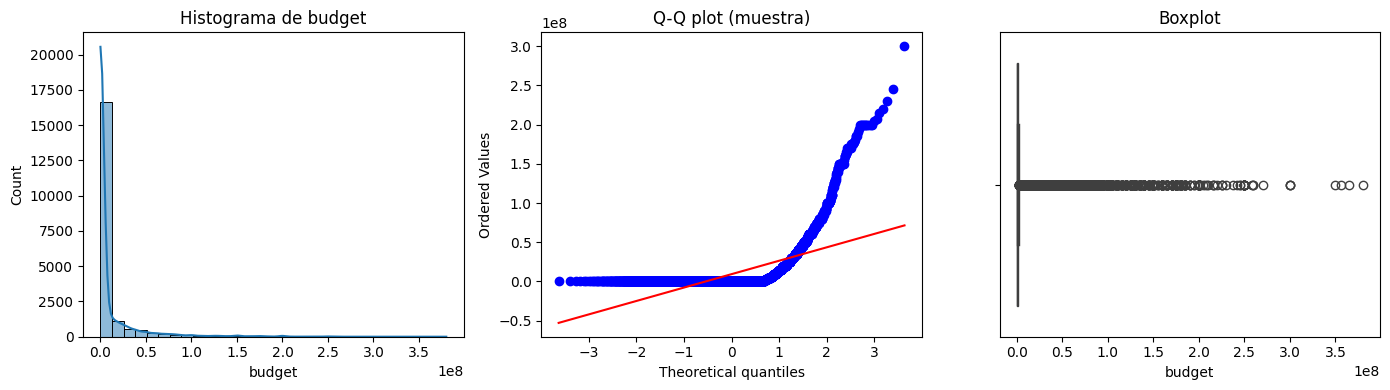

Normaltest (D'Agostino): stat=4486.5343, p=0
Anderson-Darling: stat=1162.4097
Critical values (significance_level:critical_value): {np.float64(15.0): np.float64(0.561), np.float64(10.0): np.float64(0.631), np.float64(5.0): np.float64(0.752), np.float64(2.5): np.float64(0.873), np.float64(1.0): np.float64(1.035)}
--------------------------------------------------------------------------------

=== revenue (n=19883) ===
count          19,883
mean       28,792,134
std       110,980,475
min                 0
25%                 0
50%                 0
75%           330,634
max     2,847,246,203
Name: revenue, dtype: float64

Tabla de frecuencias (bins=10):
                    interval  count  percent
 (-2847246.203, 284724620.3]  19353       97
  (284724620.3, 569449240.6]    349        2
  (569449240.6, 854173860.9]    103        1
 (854173860.9, 1138898481.2]     52        0
(1138898481.2, 1423623101.5]     14        0
(1423623101.5, 1708347721.8]      6        0
(1708347721.8, 199307234

/tmp/ipykernel_145300/1236220085.py:45: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  ad = stats.anderson(s_sample, dist='norm')


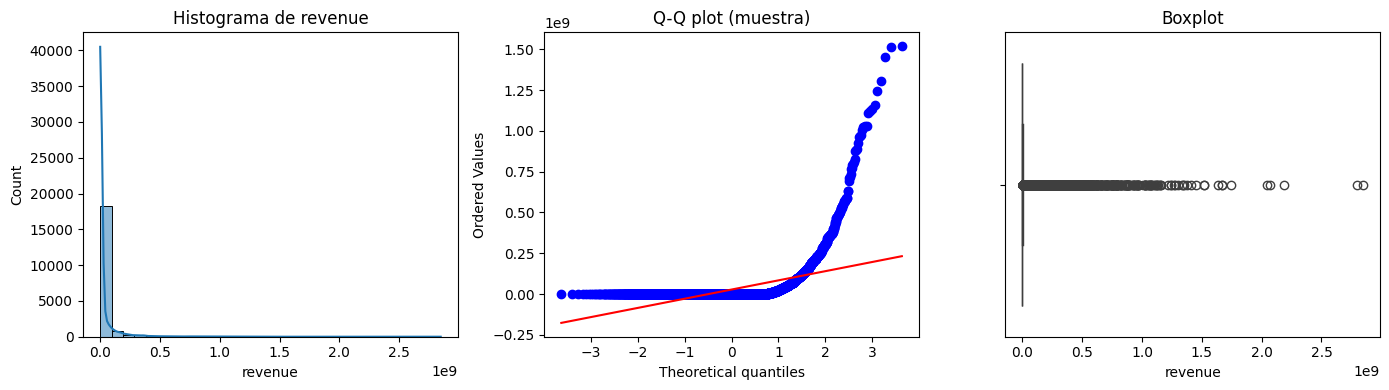

Normaltest (D'Agostino): stat=6303.7764, p=0
Anderson-Darling: stat=1304.9094
Critical values (significance_level:critical_value): {np.float64(15.0): np.float64(0.561), np.float64(10.0): np.float64(0.631), np.float64(5.0): np.float64(0.752), np.float64(2.5): np.float64(0.873), np.float64(1.0): np.float64(1.035)}
--------------------------------------------------------------------------------

=== runtime (n=19883) ===
count   19,883
mean        66
std         50
min          0
25%         10
50%         86
75%        103
max        750
Name: runtime, dtype: float64

Tabla de frecuencias (bins=10):
      interval  count  percent
 (-0.75, 75.0]   8688       44
 (75.0, 150.0]  10809       54
(150.0, 225.0]    354        2
(225.0, 300.0]     22        0
(300.0, 375.0]      5        0
(375.0, 450.0]      3        0
(450.0, 525.0]      0        0
(525.0, 600.0]      0        0
(600.0, 675.0]      1        0
(675.0, 750.0]      1        0


/tmp/ipykernel_145300/1236220085.py:45: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  ad = stats.anderson(s_sample, dist='norm')


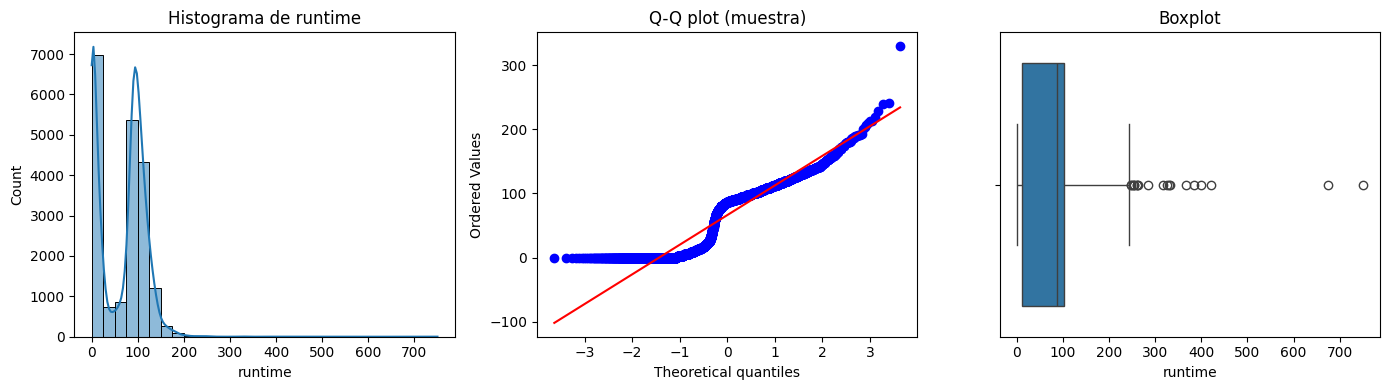

Normaltest (D'Agostino): stat=1687.9764, p=0
Anderson-Darling: stat=245.4343
Critical values (significance_level:critical_value): {np.float64(15.0): np.float64(0.561), np.float64(10.0): np.float64(0.631), np.float64(5.0): np.float64(0.752), np.float64(2.5): np.float64(0.873), np.float64(1.0): np.float64(1.035)}
--------------------------------------------------------------------------------

=== voteAvg (n=19883) ===
count   19,883
mean         4
std          3
min          0
25%          0
50%          5
75%          7
max         10
Name: voteAvg, dtype: float64

Tabla de frecuencias (bins=10):
    interval  count  percent
(-0.01, 1.0]   8354       42
  (1.0, 2.0]     49        0
  (2.0, 3.0]     42        0
  (3.0, 4.0]    157        1
  (4.0, 5.0]    729        4
  (5.0, 6.0]   2506       13
  (6.0, 7.0]   4293       22
  (7.0, 8.0]   2823       14
  (8.0, 9.0]    456        2
 (9.0, 10.0]    474        2


/tmp/ipykernel_145300/1236220085.py:45: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  ad = stats.anderson(s_sample, dist='norm')


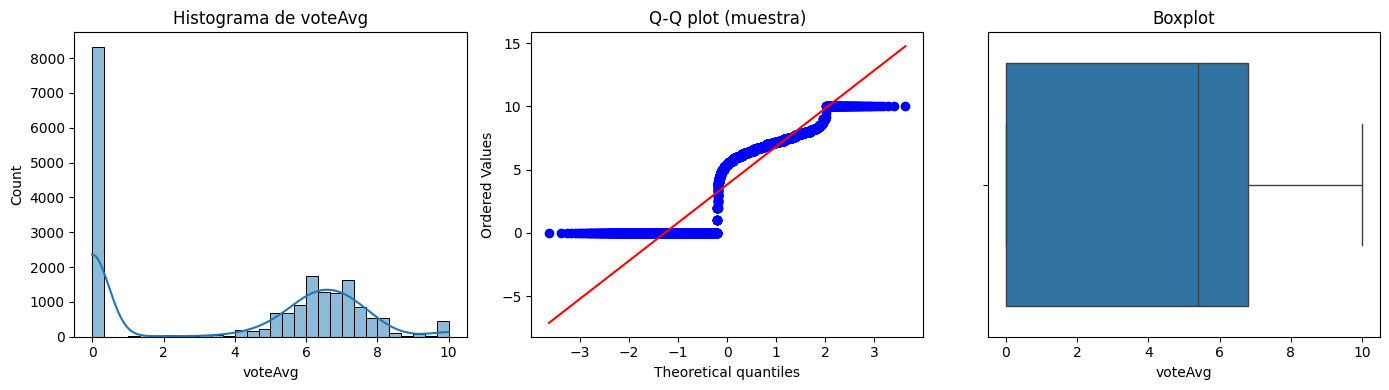

Normaltest (D'Agostino): stat=22386.9963, p=0
Anderson-Darling: stat=482.2513
Critical values (significance_level:critical_value): {np.float64(15.0): np.float64(0.561), np.float64(10.0): np.float64(0.631), np.float64(5.0): np.float64(0.752), np.float64(2.5): np.float64(0.873), np.float64(1.0): np.float64(1.035)}
--------------------------------------------------------------------------------


/tmp/ipykernel_145300/1236220085.py:45: FutureWarning: As of SciPy 1.17, users must choose a p-value calculation method by providing the `method` parameter. `method='interpolate'` interpolates the p-value from pre-calculated tables; `method` may also be an instance of `MonteCarloMethod` to approximate the p-value via Monte Carlo simulation. When `method` is specified, the result object will include a `pvalue` attribute and not attributes `critical_value`, `significance_level`, or `fit_result`. Beginning in 1.19.0, these other attributes will no longer be available, and a p-value will always be computed according to one of the available `method` options.
  ad = stats.anderson(s_sample, dist='norm')


In [45]:
variables = ["budget", "revenue", "runtime", "voteAvg"]


vars_to_check = variables if 'variables' in globals() else ["budget", "revenue", "runtime", "voteAvg"]

for var in vars_to_check:
    s = data[var].dropna()
    print(f"\n=== {var} (n={len(s)}) ===")
    print(s.describe())

    # Tabla de frecuencias (10 bins)
    freq = pd.cut(s, bins=10).value_counts().sort_index()
    freq_df = freq.rename_axis('interval').reset_index(name='count')
    freq_df['percent'] = (freq_df['count'] / len(s) * 100).round(2)
    print("\nTabla de frecuencias (bins=10):")
    print(freq_df.to_string(index=False))

    # Usar muestra para pruebas si la muestra es muy grande
    s_sample = s.sample(n=5000, random_state=0) if len(s) > 5000 else s

    # Gráficos: histograma + KDE, Q-Q plot, boxplot
    plt.figure(figsize=(14, 4))
    plt.subplot(1, 3, 1)
    sb.histplot(s, bins=30, kde=True)
    plt.title(f"Histograma de {var}")

    plt.subplot(1, 3, 2)
    stats.probplot(s_sample, dist="norm", plot=plt)
    plt.title("Q-Q plot (muestra)")

    plt.subplot(1, 3, 3)
    sb.boxplot(x=s)
    plt.title("Boxplot")

    plt.tight_layout()
    plt.show()

    # Pruebas de normalidad
    try:
        k2, p = stats.normaltest(s_sample)
        print(f"Normaltest (D'Agostino): stat={k2:.4f}, p={p:.4g}")
    except Exception as e:
        print("Normaltest error:", e)

    ad = stats.anderson(s_sample, dist='norm')
    print(f"Anderson-Darling: stat={ad.statistic:.4f}")
    print("Critical values (significance_level:critical_value):",
          dict(zip(ad.significance_level, ad.critical_values)))
    print("-" * 80)

4. Preguntas

4.1.  ¿Cuáles son las 10 películas que contaron con más presupuesto?

In [46]:
top_10_budget = (
    data
    .dropna(subset=["budget"])
    .sort_values(by="budget", ascending=False)
    .head(10)
    [["title", "budget"]]
)

print(top_10_budget)

                                             title      budget
10606  Pirates of the Caribbean: On Stranger Tides 380,000,000
14600                      Avengers: Age of Ultron 365,000,000
15842                            Avengers: Endgame 356,000,000
5907                          Avatar: Fire and Ash 350,000,000
10053     Pirates of the Caribbean: At World's End 300,000,000
15843                       Avengers: Infinity War 300,000,000
14843                               Justice League 300,000,000
10497                             Superman Returns 270,000,000
13681                                      Tangled 260,000,000
17024                                The Lion King 260,000,000


4.2. ¿Cuáles son las 10 películas que más ingresos tuvieron?

In [47]:
top_10_revenue = (
    data
    .dropna(subset=["revenue"])
    .sort_values(by="revenue", ascending=False)
    .head(10)
    [["title", "revenue"]]
)

print(top_10_revenue)

                              title       revenue
13100                        Avatar 2,847,246,203
15842             Avengers: Endgame 2,797,800,564
10197                       Titanic 2,187,463,944
14837  Star Wars: The Force Awakens 2,068,223,624
15843        Avengers: Infinity War 2,046,239,637
8481                     Zootopia 2 1,744,338,246
14804                Jurassic World 1,671,713,208
17024                 The Lion King 1,667,635,327
18937       Spider-Man: No Way Home 1,631,853,496
13287                  The Avengers 1,518,815,515


4.3. ¿Cuál es la película que más votos tuvo?

In [48]:
top_1_voted = (
    data
    .dropna(subset=["voteCount"])
    .sort_values(by="voteCount", ascending=False)
    .head(1)
    [["title", "voteCount"]]
)

top_1_avg_vote= (
    data
    .dropna(subset=["voteAvg"])
    .sort_values(by="voteAvg", ascending=False)
    .head(1)
    [["title", "voteAvg"]]
)

print(top_1_voted)

print(top_1_avg_vote)

           title  voteCount
13401  Inception      30788
       title  voteAvg
2686  SAÃDE       10


4.4.  ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios? 

In [49]:
#se realiza una validación para ver que la película no tenga 0 votos,
#ya que si esta no ha sido evaluada no puede ser la peor película
#de esta manera busca eliminarse un sesgo

data_filtrada = data[
    (data["voteCount"] >= 50) &
    (data["voteAvg"].notna())
]

worst_movie = (
    data_filtrada
    .sort_values(by="voteAvg", ascending=True)
    .head(1)[["title", "voteAvg", "voteCount"]]
)

worst_movie


,title,voteAvg,voteCount
12656,Dragonball Evolution,3,1600


4.5.  ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más películas? Haga un gráfico de barras

     releaseYear  num_movies
0          1,902           1
1          1,920           1
2          1,921           1
3          1,922           1
4          1,925           2
..           ...         ...
96         2,020         531
97         2,021         814
98         2,022           7
99         2,025        7351
100        2,026        2537

[101 rows x 2 columns]


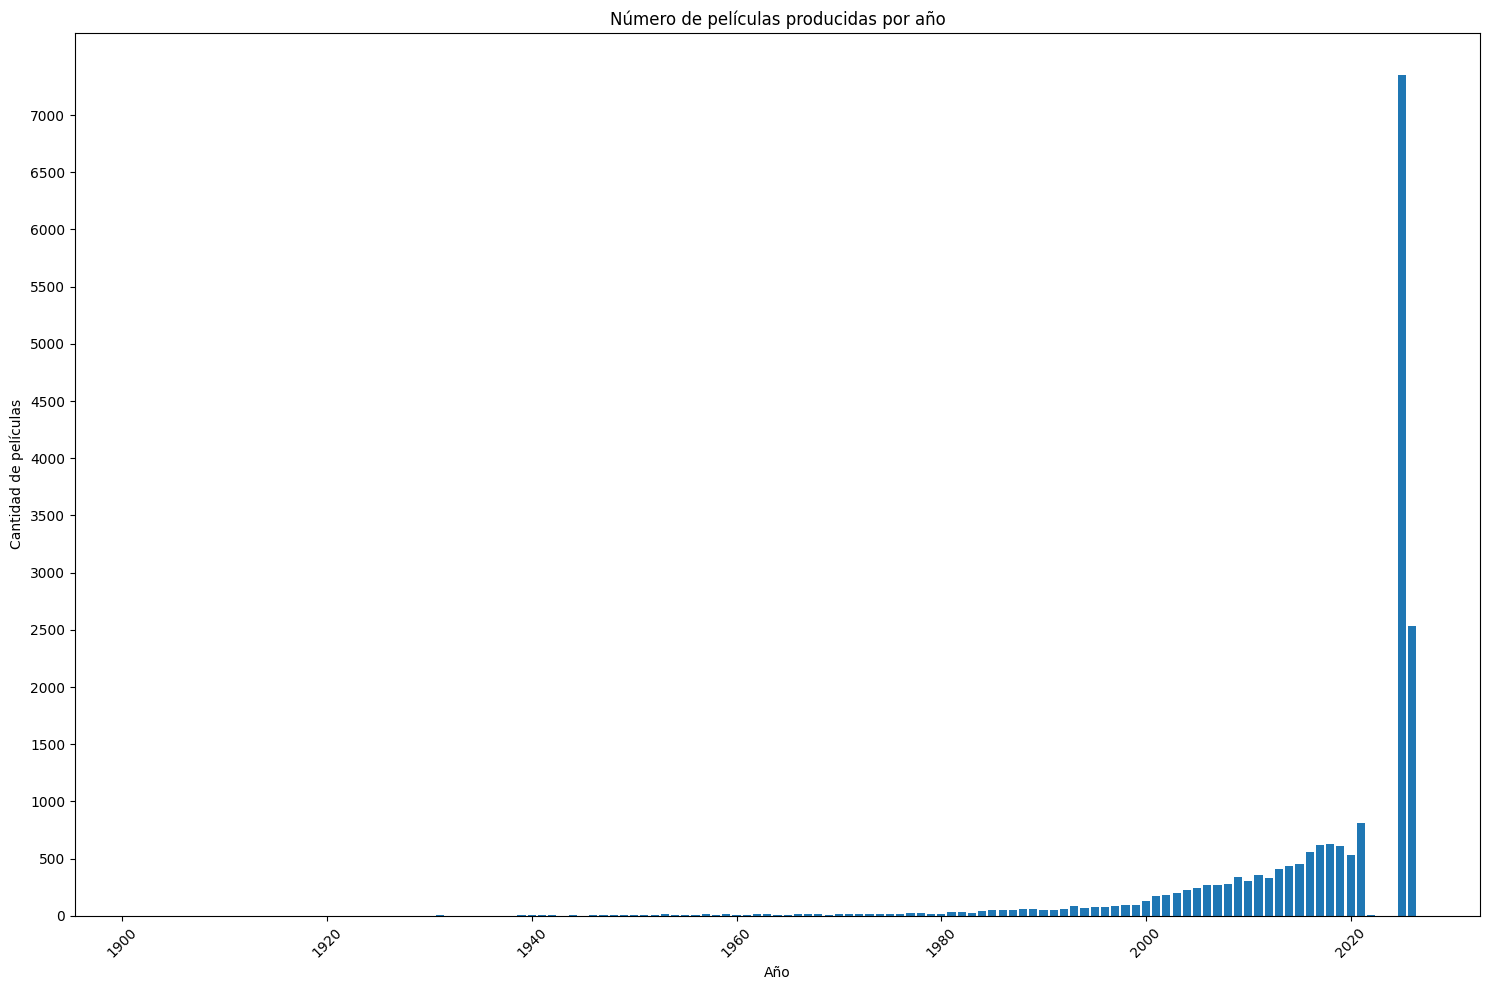

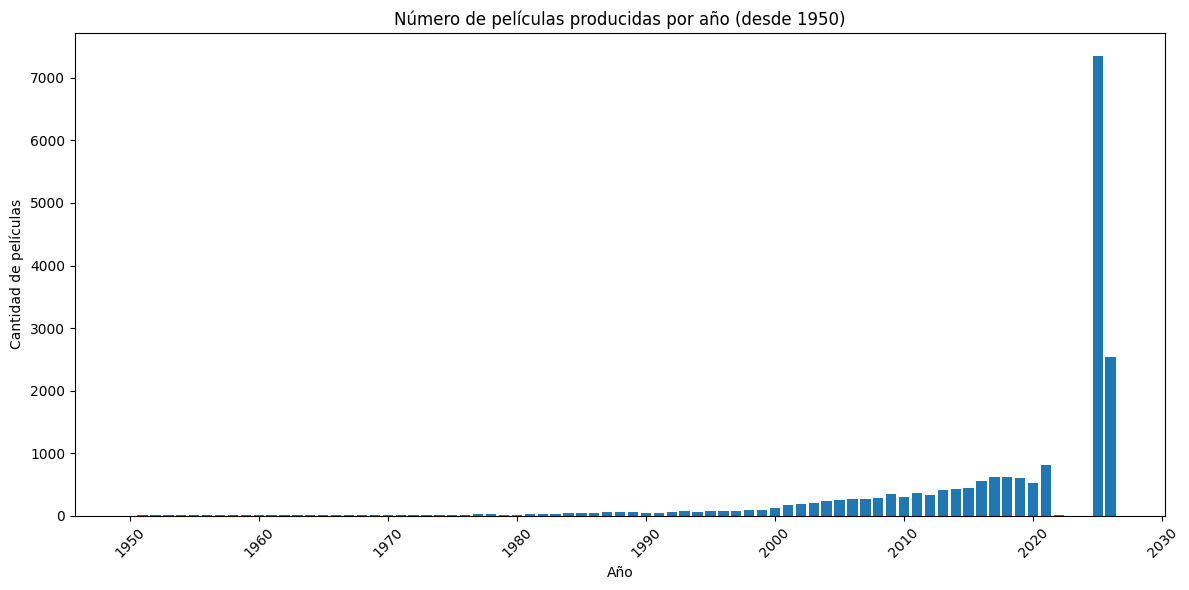

In [50]:
movies_per_year = (
    data
    .dropna(subset=["releaseYear"])
    .groupby("releaseYear")
    .size()
    .reset_index(name="num_movies")
)

print(movies_per_year)

year_most_movies = movies_per_year.loc[
    movies_per_year["num_movies"].idxmax()
]

year_most_movies

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.bar(
    movies_per_year["releaseYear"],
    movies_per_year["num_movies"]
)

plt.title("Número de películas producidas por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)

plt.yticks(
    np.arange(
        0,
        movies_per_year["num_movies"].max(),
        500
    )
)

plt.tight_layout()
plt.show()

movies_per_year_filtrado = movies_per_year[
    movies_per_year["releaseYear"] >= 1950
]

plt.figure(figsize=(12, 6))
plt.bar(
    movies_per_year_filtrado["releaseYear"],
    movies_per_year_filtrado["num_movies"]
)

plt.title("Número de películas producidas por año (desde 1950)")
plt.xlabel("Año")
plt.ylabel("Cantidad de películas")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



4.6. ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género
principal que predomina en el conjunto de datos? Represéntelo usando un gráfico. ¿A qué
género principal pertenecen las películas más largas?

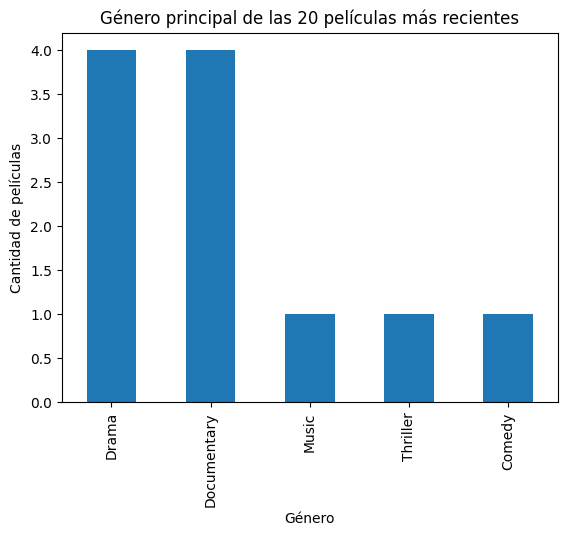

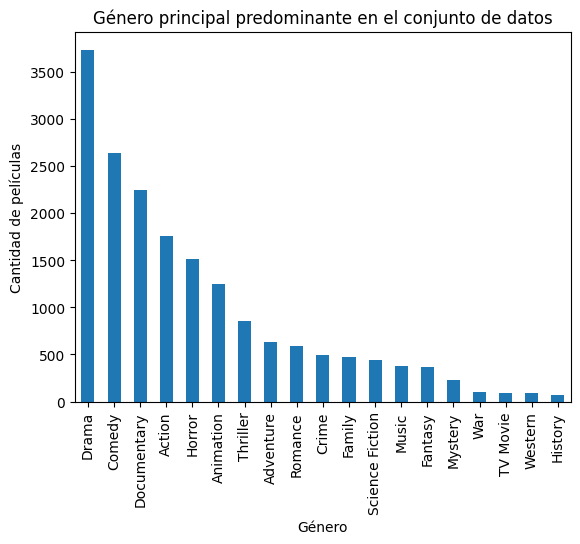

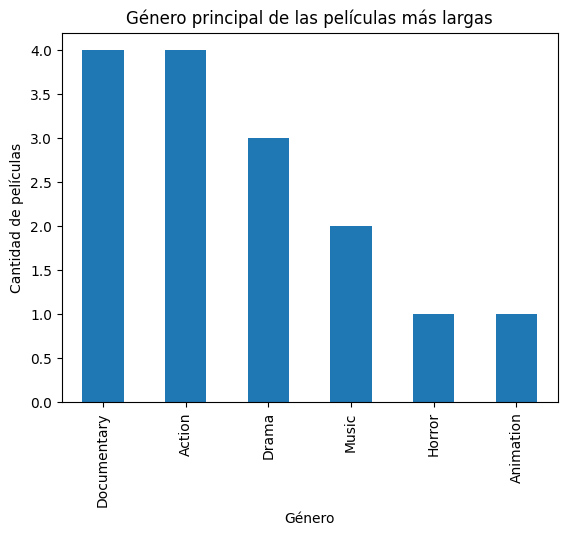

In [51]:
### Preparación de Datos ###
# Convertir la fecha a formato datetime
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Extraer el género principal (primer género antes del "|")
data['main_genre'] = data['genres'].str.split('|').str[0]

#20 películas más recientes
pelis_recientes = data.sort_values('releaseDate', ascending=False).head(20)

#Género principal
genero_reciente = pelis_recientes['main_genre'].value_counts()
genero_reciente

#Gráfico
plt.figure()
genero_reciente.plot(kind='bar')
plt.title("Género principal de las 20 películas más recientes")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

#Género principal que predomina en el conjunto de datos
genre_counts = data['main_genre'].value_counts()
genre_counts

#Gráfico
plt.figure()
genre_counts.plot(kind='bar')
plt.title("Género principal predominante en el conjunto de datos")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

#Género principal películas más largas
data_runtime = data.dropna(subset=['runtime']) # Eliminar películas sin duración
longest_movies = data_runtime.sort_values('runtime', ascending=False).head(20) #20 películas con mayor duración
longest_movies[['title', 'runtime', 'main_genre']]
genre_longest = longest_movies['main_genre'].value_counts() #conteo géneros
genre_longest

#Gráfico
plt.figure()
genre_longest.plot(kind='bar')
plt.title("Género principal de las películas más largas")
plt.xlabel("Género")
plt.ylabel("Cantidad de películas")
plt.show()

4.7.  ¿Las películas de qué genero principal obtuvieron mayores ganancias?

In [52]:
df_revenue = data[data['revenue'] > 0] # Eliminar películas sin ingresos o con ingresos 0

total_revenue_by_genre = (
    df_revenue
    .groupby('main_genre')['revenue']
    .sum()
    .sort_values(ascending=False)
)

print("Ingresos por género principal:\n")
print(total_revenue_by_genre)

top_genre = total_revenue_by_genre.idxmax()
top_revenue = total_revenue_by_genre.max()

print(f"\nEl género principal con mayores ingresos es: {top_genre}")
print(f"Ingresos totales: {top_revenue}")



Ingresos por género principal:

main_genre
Action            141,123,441,596
Adventure          86,453,734,588
Comedy             73,126,136,133
Drama              66,496,667,695
Animation          46,064,944,928
Science Fiction    27,207,932,301
Family             27,075,156,983
Horror             23,837,232,238
Fantasy            22,835,773,562
Thriller           17,111,429,095
Crime              13,764,408,250
Romance             9,588,063,036
War                 5,151,630,857
Mystery             4,983,908,835
Music               3,493,810,925
Western             1,843,584,942
History             1,487,850,337
Documentary           354,239,166
Name: revenue, dtype: float64

El género principal con mayores ingresos es: Action
Ingresos totales: 141123441596.0


4.8. ¿La cantidad de actores influye en los ingresos de las películas?¿se han hecho
películas con más actores en los últimos años?

In [53]:
data['total_cast'] = data['castWomenAmount'] + data['castMenAmount'] # Crear variable de tamaño total del elenco

df_cast = data[(data['total_cast'] > 0) & (data['revenue'] > 0)] # Filtrar valores válidos

correlation = df_cast['total_cast'].corr(df_cast['revenue']) #Correlación cast e ingresos

print("Correlación entre cantidad actores e ingresos:")
print(correlation)

if correlation > 0.5:
    print("Existe una correlación positiva fuerte entre el tamaño del elenco y los ingresos.")
elif correlation > 0.3:
    print("Existe una correlación positiva moderada entre el tamaño del elenco y los ingresos.")
elif correlation > 0:
    print("Existe una correlación positiva débil entre el tamaño del elenco y los ingresos.")
else:
    print("No se observa una correlación positiva entre el tamaño del elenco y los ingresos.")

#Cantidad actores en los últimos años
cast_by_year = (
    df_cast
    .groupby('releaseYear')['total_cast']
    .mean()
)

print("Cantidad promedio de actores por año (últimos años):\n")
print(cast_by_year.tail(10))

first_year = cast_by_year.index.min()
last_year = cast_by_year.index.max()

difference = cast_by_year.loc[last_year] - cast_by_year.loc[first_year]

print(f"\nPromedio de actores en {first_year}: {cast_by_year.loc[first_year]:.2f}")
print(f"Promedio de actores en {last_year}: {cast_by_year.loc[last_year]:.2f}")
print(f"Diferencia: {difference:.2f}")

if difference > 0:
    print("En los últimos años se han hecho películas con más actores.")
else:
    print("No se observa un aumento en la cantidad de actores en los últimos años.")



Correlación entre cantidad actores e ingresos:
0.01775643687118704
Existe una correlación positiva débil entre el tamaño del elenco y los ingresos.
Cantidad promedio de actores por año (últimos años):

releaseYear
2,014      27
2,015      27
2,016   1,500
2,017      26
2,018      26
2,019   2,804
2,020      21
2,021   4,067
2,025       5
2,026       6
Name: total_cast, dtype: float64

Promedio de actores en 1920.0: 9.00
Promedio de actores en 2026.0: 5.83
Diferencia: -3.17
No se observa un aumento en la cantidad de actores en los últimos años.


4.9. ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la
popularidad y los ingresos de las películas?

Correlación entre cantidad de actores y popularidad:
-0.0006822596401373511
No se observa una correlación positiva entre el tamaño del elenco y la popularidad.


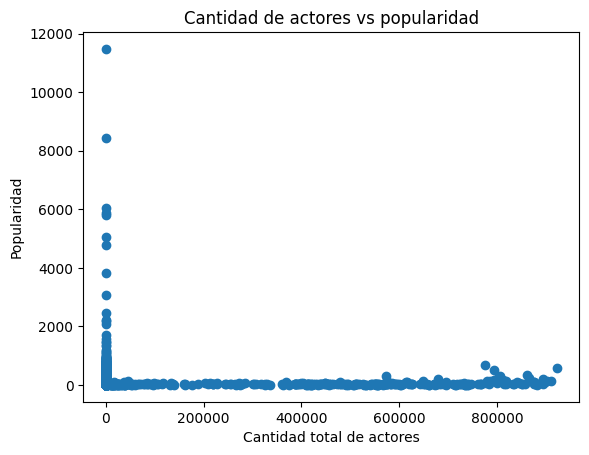

In [54]:
df_pop = data[(data['actorsAmount'] > 0) & (data['popularity'] > 0)] #limpia datos

correlation = df_pop['actorsAmount'].corr(df_pop['popularity']) #correlación 
print("Correlación entre cantidad de actores y popularidad:")
print(correlation)

if correlation > 0.5:
    print("Existe una correlación positiva fuerte entre el tamaño del elenco y la popularidad.")
elif correlation > 0.3:
    print("Existe una correlación positiva moderada entre el tamaño del elenco y la popularidad.")
elif correlation > 0:
    print("Existe una correlación positiva débil entre el tamaño del elenco y la popularidad.")
else:
    print("No se observa una correlación positiva entre el tamaño del elenco y la popularidad.")

plt.figure()
plt.scatter(df_pop['total_cast'], df_pop['popularity'])
plt.xlabel("Cantidad total de actores")
plt.ylabel("Popularidad")
plt.title("Cantidad de actores vs popularidad")
plt.show()

4.10. ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?

In [55]:
top_20_movies = (
    data_filtrada
    .sort_values(by="voteAvg", ascending=False)
    .head(20)[["title", "director", "voteAvg", "voteCount"]]
)

listado_director_pelicula = (
    top_20_movies
    [["director", "title"]]
    .rename(columns={
        "director": "Director",
        "title": "Película"
    })
    .reset_index(drop=True)
)

listado_director_pelicula



,Director,Película
0,Ulises Valencia,Franco Escamilla: Por La Anécdota
1,Kim Nam-joon|Jeon Jung-kook|Kim Tae-hyung|Park...,BTS World Tour: Love Yourself - Japan Edition
2,Park Jun-soo,Break the Silence: The Movie
3,Park Jun-soo,Bring the Soul: The Movie
4,Michael Goguen,Scooby-Doo! and the Spooky Scarecrow
5,Carlos Pérez Osorio,The Three Deaths of Marisela Escobedo
6,Park Jun-soo,Burn the Stage: The Movie
7,Jomac Noph,Scooby-Doo! Adventures: The Mystery Map
8,Takahiro Miki,Your Eyes Tell
9,Taichi Ishidate,Violet Evergarden: The Movie


4.11. ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión

Correlación entre presupuesto e ingresos:
0.7228508713731299
Existe una correlación positiva fuerte entre el presupuesto y los ingresos.


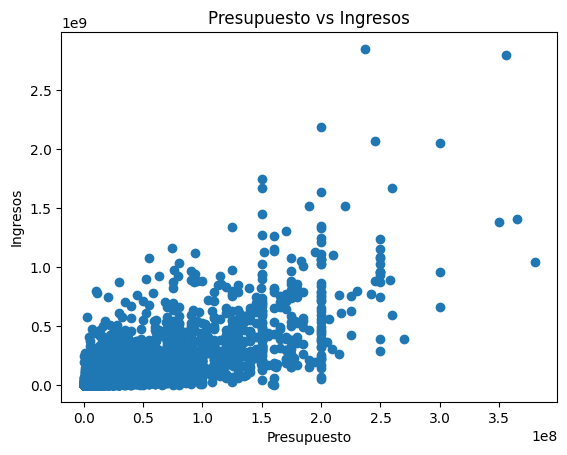

In [56]:
df_pop = data[(data['budget'] > 0) & (data['revenue'] > 0)] #limpia datos

correlation = df_pop['budget'].corr(df_pop['revenue']) #correlación 
print("Correlación entre presupuesto e ingresos:")
print(correlation)

if correlation > 0.5:
    print("Existe una correlación positiva fuerte entre el presupuesto y los ingresos.")
elif correlation > 0.3:
    print("Existe una correlación positiva moderada entre el presupuesto y los ingresos.")
elif correlation > 0:
    print("Existe una correlación positiva débil entre el presupuesto y los ingresos.")
else:
    print("No se observa una correlación positiva entre el presupuesto y los ingresos.")

plt.figure()
plt.scatter(df_pop['budget'], df_pop['revenue'])
plt.xlabel("Presupuesto")
plt.ylabel("Ingresos")
plt.title("Presupuesto vs Ingresos")
plt.show()

4.12. ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?

In [57]:
#date es una string entonces hay que convertirla a fecha para poder extraer el mes ocn la función correspondiente
data["releaseDate"] = pd.to_datetime(
    data["releaseDate"],
    errors="coerce"
)

revenue_by_month = (
    data
    .dropna(subset=["release_month", "revenue"])
    .groupby("release_month")["revenue"]
    .mean()
    .reset_index()
)

revenue_by_month["Mes"] = revenue_by_month["release_month"].map(month_names)

plt.figure(figsize=(10, 6))
plt.bar(
    revenue_by_month["Mes"],
    revenue_by_month["revenue"]
)

plt.title("Ingreso promedio según el mes de lanzamiento")
plt.xlabel("Mes de lanzamiento")
plt.ylabel("Ingreso promedio")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


KeyError: ['release_month']

4.13.  ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿cuantas películas, en promedio, se han lanzado por mes?

In [ ]:

# Convertir releaseDate a datetime
data['releaseDate'] = pd.to_datetime(data['releaseDate'], errors='coerce')

# Extraer el mes
revenue_by_month = (
    data[data['revenue'] > 0]
    .groupby(data['releaseDate'].dt.month)['revenue']
    .mean()
)


print("Ingresos promedio por mes:\n")
print(revenue_by_month)

best_month = revenue_by_month.idxmax() #mejor mes
best_month_revenue = revenue_by_month.max()

print(f"\nEl mes con mayores ingresos promedio es: {best_month}")
print(f"Ingreso promedio en ese mes: {best_month_revenue}")

movies_per_month = data.groupby(data_runtime['releaseDate'].dt.month).size()

print("\nCantidad de películas lanzadas por mes:\n")
print(movies_per_month)

average_movies_per_month = movies_per_month.mean()

print(f"\nCantidad promedio de películas lanzadas por mes: {average_movies_per_month}")

#Gráfica
plt.figure()
plt.bar(revenue_by_month.index, revenue_by_month.values)
plt.xlabel("Mes de estreno")
plt.ylabel("Ingresos promedio")
plt.title("Ingresos promedio por mes de estreno")
plt.show()

plt.figure()
plt.bar(movies_per_month.index, movies_per_month.values)
plt.xlabel("Mes de estreno")
plt.ylabel("Cantidad de películas")
plt.title("Cantidad de películas estrenadas por mes")
plt.show()



4.14. ¿Cómo se correlacionan las calificaciones con el éxito comercial?

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data_corr = data[
    (data["voteCount"] >= 50) &
    (data["voteAvg"] > 0) &        
    (data["revenue"] > 0)          
]

# Seleccionar solo variables numéricas
data_numeric = data_corr.select_dtypes(include=["int64", "float64"])

# Matriz de correlación
corr_matrix = data_numeric.corr()

plt.figure(figsize=(14, 10))
plt.imshow(corr_matrix, cmap="coolwarm")
plt.colorbar()

plt.xticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns,
    rotation=90
)
plt.yticks(
    ticks=np.arange(len(corr_matrix.columns)),
    labels=corr_matrix.columns
)

plt.title("Mapa de calor de correlaciones entre variables cuantitativas")
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(
    data_corr["voteAvg"],
    data_corr["revenue"],
    alpha=0.5
)

plt.xlabel("Calificación promedio (voteAvg)")
plt.ylabel("Ingresos (revenue)")
plt.title("Relación entre calificación de usuarios y éxito comercial")

plt.tight_layout()
plt.show()

4.15. ¿Qué estrategias de marketing, como videos promocionales o páginas oficiales, generan mejores resultados?  

In [ ]:
# Variable binaria: tiene página oficial
data['has_homepage'] = data['homePage'].apply(
    lambda x: 1 if isinstance(x, str) and x.strip() != "" else 0
)

# Variable binaria: tiene video promocional (corrigiendo NaN)
data['has_video'] = data['video'].fillna(0).astype(int)

#Impactos de videos promocionales y páginas oficiales en ingresos y popularidad
video_results = data.groupby('has_video')[['revenue', 'popularity']].mean()

print("Resultados según videos promocionales:\n")
print(video_results)

homepage_results = data.groupby('has_homepage')[['revenue', 'popularity']].mean()

print("\nResultados según página oficial:\n")
print(homepage_results)

#COMPARACIÓN
video_only = data[data['has_video'] == 1]
homepage_only = data[data['has_homepage'] == 1]

video_metrics = video_only[['revenue', 'popularity']].mean()
homepage_metrics = homepage_only[['revenue', 'popularity']].mean()

print("Promedios – Películas con VIDEO promocional:\n")
print(video_metrics)

print("\nPromedios – Películas con PÁGINA OFICIAL:\n")
print(homepage_metrics)


labels = ['Video promocional', 'Página oficial']
revenue_values = [video_metrics['revenue'], homepage_metrics['revenue']]

#Gráfica
plt.figure()
plt.bar(labels, revenue_values)
plt.ylabel('Ingresos promedio')
plt.title('Ingresos promedio: Video promocional vs Página oficial')
plt.show()

popularity_values = [video_metrics['popularity'], homepage_metrics['popularity']]

plt.figure()
plt.bar(labels, popularity_values)
plt.ylabel('Popularidad promedio')
plt.title('Popularidad promedio: Video promocional vs Página oficial')
plt.show()


4.16. ¿La popularidad del elenco está directamente correlacionada con el éxito de taquilla?

In [ ]:
#Promedio de popularidad del elenco
def average_actors_popularity(value):
    if isinstance(value, str) and value.strip() != "":
        values = value.split('|')
        numeric_values = []
        for v in values:
            try:
                numeric_values.append(float(v))
            except ValueError:
                continue  # ignorar valores no numéricos
        if len(numeric_values) > 0:
            return sum(numeric_values) / len(numeric_values)
    return None

data['avg_actors_popularity'] = data['actorsPopularity'].apply(average_actors_popularity)

# Filtrar valores válidos
cast_popularity_df = data[
    (data['avg_actors_popularity'].notna()) &
    (data['revenue'] > 0)
]

correlation = cast_popularity_df['avg_actors_popularity'].corr(
    cast_popularity_df['revenue']
)

print("Correlación entre popularidad del elenco y éxito de taquilla:")
print(correlation)

if correlation > 0.5:
    print("Existe una correlación positiva fuerte.")
elif correlation > 0.3:
    print("Existe una correlación positiva moderada.")
elif correlation > 0:
    print("Existe una correlación positiva débil.")
else:
    print("No existe una correlación positiva significativa.")

#Gráfica
plt.figure()
plt.scatter(
    cast_popularity_df['avg_actors_popularity'],
    cast_popularity_df['revenue']
)
plt.xlabel("Popularidad del elenco")
plt.ylabel("Ingresos (taquilla)")
plt.title("Popularidad del elenco vs éxito de taquilla")
plt.show()

5. Genere usted otras seis preguntas que le parezcan interesantes porque le permitan realizar otras exploraciones y respóndalas. No puede repetir ninguna de las instrucciones anteriores

5.1 ¿Existe relación entre el presupuesto y la recaudación de las películas?

Correlación budget vs revenue: 0.723


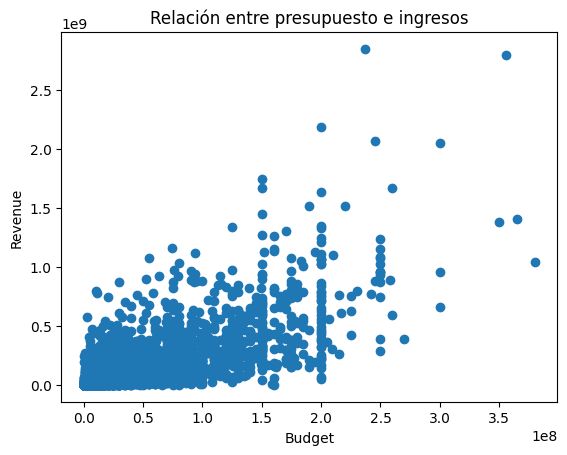

In [58]:
# Filtrar valores positivos
df_br = data[(data["budget"] > 0) & (data["revenue"] > 0)]

# Correlación
corr = df_br["budget"].corr(df_br["revenue"])
print("Correlación budget vs revenue:", round(corr, 3))

# Gráfico
plt.figure()
plt.scatter(df_br["budget"], df_br["revenue"])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.title("Relación entre presupuesto e ingresos")
plt.show()